# Clustering
The dating profiles

### Importing Libraries and Data

In [25]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

In [26]:
# Loading in the cleaned DF
with open("pkl_files/OLD_profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

# Viewing the DF    
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,5,3,4,1,3,6,7
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,7,9,5,1,9,4,0
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,1,2,6,5,6,5,4
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,5,2,7,8,2,6,6
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,6,6,6,4,3,6,3
...,...,...,...,...,...,...,...,...
6595,Typical pop culture nerd. Infuriatingly humble internet maven. Alcohol evangelist.,7,9,0,0,2,2,4
6596,Avid web junkie. Lifelong alcohol guru. Hardcore reader. Award-winning twitter evangelist.,4,3,6,3,7,7,2
6597,Music ninja. Bacon fanatic. Reader. Total communicator. Unapologetic beer specialist.,1,4,0,4,9,2,5
6598,Communicator. Bacon lover. Award-winning introvert. Amateur internet ninja.,6,2,0,3,8,9,1


## Scaling the Categories

In [27]:
# Instantiating the Scaler
scaler = MinMaxScaler()

# Scaling the categories then replacing the old values
df = df[['Bios']].join(pd.DataFrame(scaler.fit_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,0.555556,0.333333,0.444444,0.111111,0.333333,0.666667,0.777778
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,0.777778,1.000000,0.555556,0.111111,1.000000,0.444444,0.000000
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,0.111111,0.222222,0.666667,0.555556,0.666667,0.555556,0.444444
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,0.555556,0.222222,0.777778,0.888889,0.222222,0.666667,0.666667
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,0.666667,0.666667,0.666667,0.444444,0.333333,0.666667,0.333333
...,...,...,...,...,...,...,...,...
6595,Typical pop culture nerd. Infuriatingly humble internet maven. Alcohol evangelist.,0.777778,1.000000,0.000000,0.000000,0.222222,0.222222,0.444444
6596,Avid web junkie. Lifelong alcohol guru. Hardcore reader. Award-winning twitter evangelist.,0.444444,0.333333,0.666667,0.333333,0.777778,0.777778,0.222222
6597,Music ninja. Bacon fanatic. Reader. Total communicator. Unapologetic beer specialist.,0.111111,0.444444,0.000000,0.444444,1.000000,0.222222,0.555556
6598,Communicator. Bacon lover. Award-winning introvert. Amateur internet ninja.,0.666667,0.222222,0.000000,0.333333,0.888889,1.000000,0.111111


## Vectorizing the Bios

In [28]:
# Instantiating the Vectorizer
vectorizer = TfidfVectorizer()

# Fitting the vectorizer to the Bios
x = vectorizer.fit_transform(df['Bios'])

In [29]:
# Creating a new DF that contains the vectorized words
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())
df_wrds

C:\Users\Nick Georgiou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,animals,apathy,avid,award,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0
1,0.0,0.000000,0.000000,0.0,0.000000,0.30791,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.238969,0.0,0.000000,0.0,0.0,0.00000,0.0
2,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.336385,0.000000,...,0.0,0.000000,0.0,0.254821,0.0,0.000000,0.0,0.0,0.25223,0.0
3,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.247144,0.0,0.000000,0.0,0.0,0.00000,0.0
4,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,0.0,0.000000,0.272898,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0
6596,0.0,0.000000,0.242540,0.0,0.000000,0.00000,0.0,0.0,0.317036,0.320020,...,0.0,0.000000,0.0,0.240163,0.0,0.320020,0.0,0.0,0.00000,0.0
6597,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,...,0.0,0.370750,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0
6598,0.0,0.000000,0.000000,0.0,0.369445,0.00000,0.0,0.0,0.000000,0.366409,...,0.0,0.000000,0.0,0.000000,0.0,0.366409,0.0,0.0,0.00000,0.0


In [30]:
# Concating the words DF with the original DF
new_df = pd.concat([df, df_wrds], axis=1)

# Dropping the Bios because it is no longer needed in place of vectorization
new_df.drop('Bios', axis=1, inplace=True)

# Viewing the new DF
new_df

,Movies,TV,Religion,Music,Sports,Books,Politics,advocate,aficionado,alcohol,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0.555556,0.333333,0.444444,0.111111,0.333333,0.666667,0.777778,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0
1,0.777778,1.000000,0.555556,0.111111,1.000000,0.444444,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.238969,0.0,0.000000,0.0,0.0,0.00000,0.0
2,0.111111,0.222222,0.666667,0.555556,0.666667,0.555556,0.444444,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.254821,0.0,0.000000,0.0,0.0,0.25223,0.0
3,0.555556,0.222222,0.777778,0.888889,0.222222,0.666667,0.666667,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.247144,0.0,0.000000,0.0,0.0,0.00000,0.0
4,0.666667,0.666667,0.666667,0.444444,0.333333,0.666667,0.333333,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,0.777778,1.000000,0.000000,0.000000,0.222222,0.222222,0.444444,0.0,0.000000,0.272898,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0
6596,0.444444,0.333333,0.666667,0.333333,0.777778,0.777778,0.222222,0.0,0.000000,0.242540,...,0.0,0.000000,0.0,0.240163,0.0,0.320020,0.0,0.0,0.00000,0.0
6597,0.111111,0.444444,0.000000,0.444444,1.000000,0.222222,0.555556,0.0,0.000000,0.000000,...,0.0,0.370750,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0
6598,0.666667,0.222222,0.000000,0.333333,0.888889,1.000000,0.111111,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.366409,0.0,0.0,0.00000,0.0


### Performing PCA on the DF
Reducing the dimensionality of the dataset with Principal Component Analysis

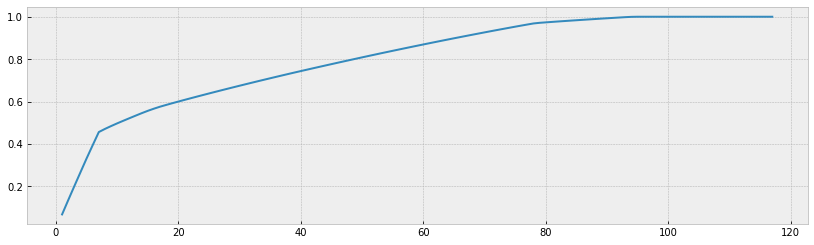

Number features: 74
Total Variance Explained: 0.9530918242791795


In [31]:
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(new_df)

# Plotting to determine how many features should the dataset be reduced to
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,new_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 95% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance>=.95])
n_to_reach_95 = new_df.shape[1] - n_over_95

print(f"Number features: {n_to_reach_95}\nTotal Variance Explained: {total_explained_variance[n_to_reach_95]}")

In [32]:
# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_95)

# Fitting and transforming the dataset to the stated number of features
df_pca = pca.fit_transform(new_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
pca.explained_variance_ratio_.cumsum()[-1]

0.9477964873937385

## KMeans

Running KMeans initially with the PCA DF to test it out

In [33]:
# Instantiating KMeans
k_means = KMeans(n_clusters=4)

# Fitting
k_means.fit(df_pca)

# Getting cluster assignments
cluster_assignments = k_means.predict(df_pca)

# Setting an evaluation score or metric
print(calinski_harabasz_score(df_pca, cluster_assignments))

272.089693019665


### Finding the Optimum Number of Clusters

In [34]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 21, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
ch_scores = []

s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in cluster_cnt:
    
    # Clustering with different number of clusters
    k_means = KMeans(n_clusters=i)
    
    k_means.fit(df_pca)
    
    cluster_assignments = k_means.predict(df_pca)
    
    # Appending the scores to the empty lists
    ch_scores.append(calinski_harabasz_score(df_pca, cluster_assignments))
    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

### Plotting the Evaluation Scores

In [35]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric
    """
    
    plt.figure(figsize=(14,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

### Calinski-Harabasz
A higher scores means better defined clusters.  Aiming for a high score

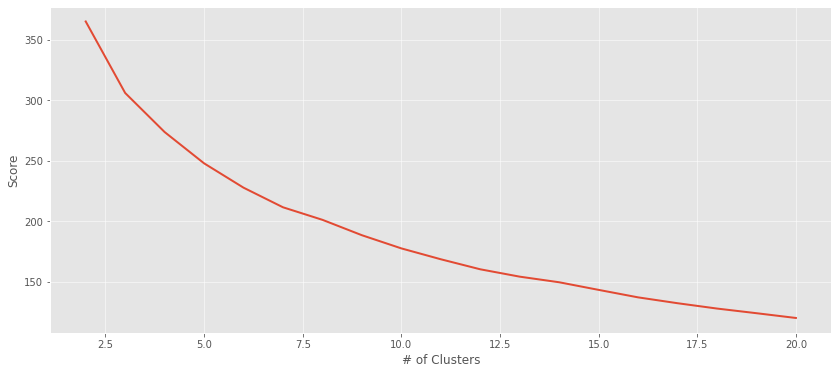

In [36]:
plot_evaluation(ch_scores)

### Silhouette Coefficient
A higher score means better defined clusters. Aim for high score.

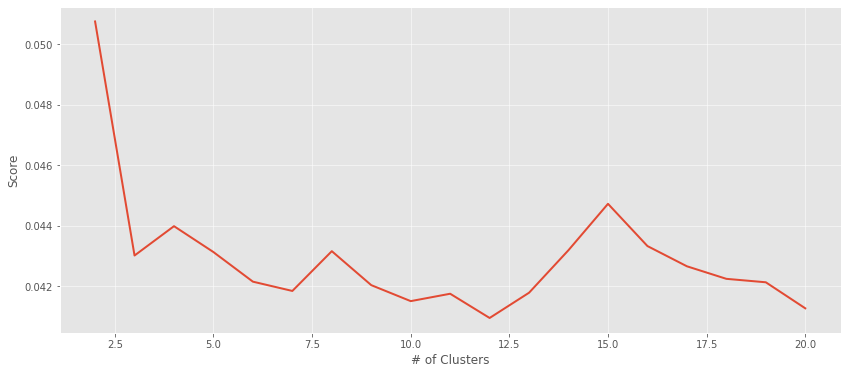

In [37]:
plot_evaluation(s_scores)

### Davies-Bouldin
A lower score is better.  Scores closer to zero are better.

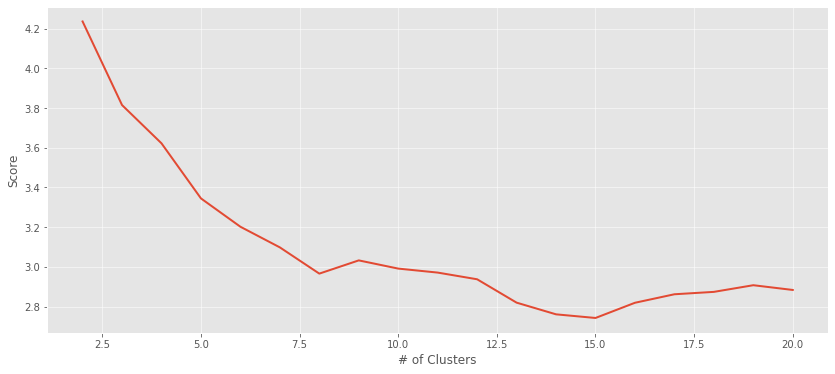

In [38]:
plot_evaluation(db_scores)